In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 35kB/s 


In [ ]:
!nvidia-smi

Tue Jun 15 07:33:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Mount Google Drive folder 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all the necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
from tensorflow.python.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, CSVLogger
from tensorflow.keras.layers import Input, Add, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import model_from_json
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import pydot
from matplotlib.pyplot import imshow
import scipy.misc
import os 
import glob
import gc
import numpy as np
import pandas as pd
import cv2
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import os
import zipfile
from google.colab import drive
import seaborn as sns
from time import time
print("tensorflow version:",tf.__version__)

tensorflow version: 2.5.0


In [ ]:
#pip install split-folders

The below cell will be run once only

In [ ]:
# import splitfolders
# input_folder = "/content/drive/MyDrive/Colab Notebooks/2nd semester/CNN project/OG Dataset/First Set"
# output = "/content/drive/MyDrive/Colab Notebooks/2nd semester/CNN project/DataSet "

# splitfolders.ratio(input_folder,output=output, seed=1337, ratio=(.8,.1,.1))

#  --seed          set seed value for shuffling the items. defaults to 1337.
#--ratio         the ratio to split. e.g. for train/val/test `.8 .1 .1 --` or for train/val `.8 .2 --`.


ResNet default input size is 224*224 u can feed 256 as well

In [ ]:
# re-size all the images to this
# these path directory is just for reference purpose only
# actually these path directory is used in below code cell
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/2nd semester/CNN project/DataSet/train'

test_path = '/content/drive/MyDrive/Colab Notebooks/2nd semester/CNN project/DataSet /test'

valid_path = '/content/drive/MyDrive/Colab Notebooks/2nd semester/CNN project/DataSet/val'

In [ ]:
train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

valid_datagen = ImageDataGenerator()

train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/2nd semester/2.CNN project/DataSet /train', class_mode='categorical', target_size=(224,224), batch_size=32)

test_data = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/2nd semester/2.CNN project/DataSet /test', class_mode='categorical', target_size=(224,224), batch_size=32,shuffle=False)

valid_data = valid_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/2nd semester/2.CNN project/DataSet /val', class_mode='categorical', target_size=(224,224), batch_size=32,shuffle=False)


Found 857 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Found 147 images belonging to 2 classes.


In [ ]:
# Import the ResNet 50 library as shown below and add preprocessing layer
# Here we will be using imagenet weights

resnet = ResNet50(input_shape =(224,224,3), weights='imagenet', include_top=False)

# Get the ResNet50 base model

# in the above code we are downloading the ResNet50 model
# and downloading the massive network imagenet
# network has been already pre-trained on million of images
# weights = 'imagenet' means I want to download the pre-trained network
# include_top = False means I dont want to include the dense layer at the end
# because I am going to add my own

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Adding Fully Connected Layer on the top of pre-trained ResNet50 base layer

In [ ]:
# We are adding 4 layers here flatten layer,dropout layer, 2 dense layers
x = resnet.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation ='softmax')(x)
model = tf.keras.models.Model(inputs=resnet.input, outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

Droupout layer increases the accuracy of the model

taking my basemodel and adding dense layer on top of it


droupout is generally used to improve the generalization capability of model
we are droping 40% of the neurons randomly and their connected weights and the
idea here is as we train the network or the
neurons start to develop co-dependency among them and by applying droupout
you will be able to remove the co-dependency which means all of these neuron

In [ ]:
# model = models.Sequential()
# model.add(resnet)
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.4)) # adding droupout of 40%
# model.add(layers.Dense(2048, activation='relu'))
# model.add(layers.Dense(2, activation = 'softmax'))
# model.summary()

Freezing the pre-trained ResNet50 basemodel weights

In [ ]:
for layer in resnet.layers[:]:
  layer.trainable = False

# in the above code we are setting all the layers in my base model i.e downloaded 
# right now and i want to freeze this weights
# i.e is done by layers.trainable = False which means i want to freeze them
# i am not gonna be training them

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
learning_rate = 1e-07

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

for a particular learning rate we have patience = 5 which means till 5 epochs model will see whether the validation loss is decreasing or not, if not it will use min_learning rate

In [ ]:
# save the best model with least validation loss
# resnet-finetune-model.h5->these are the actual train parameters
callbacks_list = [callbacks.ModelCheckpoint(
        filepath = '/content/drive/MyDrive/Colab Notebooks/2nd semester/2.CNN project/DataSet /resnet-finetune-model.h5',
        monitor = 'val_loss',
        save_best_only = True),
        callbacks.CSVLogger(
            filename='/content/drive/MyDrive/Colab Notebooks/2nd semester/2.CNN project/DataSet /resnet-finetune-model.csv',
            separator = ',',
            append = False),
        callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)]

Below code show fitting the model with the training data and specifying how many epochs we are looking for(5)
showing the performance of the network just within 5 epoch only
while running the cell we can see the accuracy of our new model
here we have new images the model has never seen this images before
but because we started from pre-trained model on the imagenet-dataset
the model was able to achieve some accuracy and never even started the training yet


In [ ]:
batch_size = 32
history = model.fit(train_data,
                             steps_per_epoch=857//batch_size,
                             epochs=5,
                             validation_data=valid_data,
                             validation_steps=147//batch_size,
                             callbacks=callbacks_list)


Epoch 1/5
26/26 [==============================] - 1052s 40s/step - loss: 1.3089 - accuracy: 0.4800 - val_loss: 0.9974 - val_accuracy: 0.4922


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
26/26 [==============================] - 276s 10s/step - loss: 1.1241 - accuracy: 0.5361 - val_loss: 0.9051 - val_accuracy: 0.5391
Epoch 3/5
26/26 [==============================] - 278s 11s/step - loss: 1.0765 - accuracy: 0.5903 - val_loss: 0.7735 - val_accuracy: 0.5938
Epoch 4/5
26/26 [==============================] - 276s 10s/step - loss: 0.9272 - accuracy: 0.6182 - val_loss: 0.7028 - val_accuracy: 0.6328
Epoch 5/5
26/26 [==============================] - 281s 11s/step - loss: 0.8658 - accuracy: 0.6606 - val_loss: 0.6375 - val_accuracy: 0.6641


Unfreezing the ResNet5c block

In [ ]:
#resnet.trainable = True
for layer in resnet.layers[:165]:
  layer.trainable = False
for layer in resnet.layers[165:]:
  layer.trainable = True

for i, layer in enumerate(resnet.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=learning_rate),
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# there are total 857 images which are fed into resnet in batchsize of 32 therefore to complete all images we require 26 epochs
# after 26 epochs are over the model is trained on all images once, so here we have kind of fit the model twice
print('Fit the model...')
t0 = time() #timing counter starts
print('The model has started learning...')
nepochs=50
batch_size=32
history=model.fit(train_data, #Learning process starts
                  steps_per_epoch=857//batch_size,
                  epochs=nepochs,
                  validation_data=valid_data,
                  validation_steps=147//batch_size,
                  callbacks=callbacks_list)
print('Fit model took', (int(time() - t0)/3600),'Hour') #time is calculated with the help of counter

Fit the model...
The model has started learning...
Epoch 1/50
26/26 [==============================] - 318s 12s/step - loss: 0.7905 - accuracy: 0.6909 - val_loss: 0.5528 - val_accuracy: 0.7031


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
26/26 [==============================] - 311s 12s/step - loss: 0.7011 - accuracy: 0.7103 - val_loss: 0.5158 - val_accuracy: 0.7500
Epoch 3/50
26/26 [==============================] - 314s 12s/step - loss: 0.6195 - accuracy: 0.7236 - val_loss: 0.4878 - val_accuracy: 0.7734
Epoch 4/50
26/26 [==============================] - 309s 12s/step - loss: 0.6113 - accuracy: 0.7430 - val_loss: 0.4790 - val_accuracy: 0.7734
Epoch 5/50
26/26 [==============================] - 317s 12s/step - loss: 0.6406 - accuracy: 0.7406 - val_loss: 0.4401 - val_accuracy: 0.8125
Epoch 6/50
26/26 [==============================] - 308s 12s/step - loss: 0.5856 - accuracy: 0.7612 - val_loss: 0.4261 - val_accuracy: 0.8203
Epoch 7/50
26/26 [==============================] - 313s 12s/step - loss: 0.5394 - accuracy: 0.7697 - val_loss: 0.4056 - val_accuracy: 0.8281
Epoch 8/50
26/26 [==============================] - 306s 12s/step - loss: 0.5143 - accuracy: 0.7855 - val_loss: 0.3998 - val_accuracy: 0.8125
Epoch 

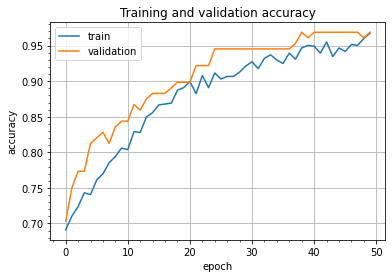

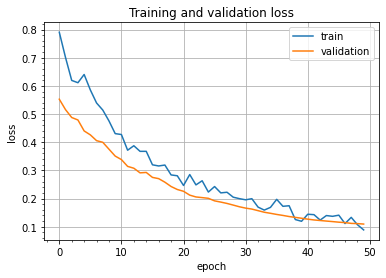

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.minorticks_on()
plt.grid(True)
plt.legend(['train', 'validation'])
# save image to disk
plt.savefig('RESNET Final Model Accuracy', dpi=250)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.minorticks_on()
plt.grid(True)
plt.legend(['train', 'validation'])
# save image to disk
plt.savefig('RESNET Final Model Loss', dpi=250)
plt.show()

As long as validation loss is lower than or even equal to training loss one should keep doing more training

model evaluation in four different categories:

Underfitting – Validation and training error high

Overfitting – Validation error is high, training error low

Good fit – Validation error low, slightly higher than the training error

Unknown fit - Validation error low, training error 'high'

In [ ]:
# save the model architecture to model.json file for future use
model_json = model.to_json()
with open("/content/drive/MyDrive/Colab Notebooks/2nd semester/2.CNN project/DataSet /model.json","w") as json_file:
  json_file.write(model_json)
#serializing the weights to HDF5
model.save('/content/drive/MyDrive/Colab Notebooks/2nd semester/2.CNN project/DataSet /RESNET-Final-Model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# Load pretrained model (instead of training the model for 5+ hours) 
with open('/content/drive/MyDrive/Colab Notebooks/2nd semester/2.CNN project/DataSet /model.json', 'r') as json_file:
    json_savedModel= json_file.read()
# load the model  
loaded_model = tf.keras.models.model_from_json(json_savedModel)
loaded_model.load_weights('/content/drive/MyDrive/Colab Notebooks/2nd semester/2.CNN project/DataSet /RESNET-Final-Model.h5')
loaded_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [ ]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
import numpy as np
y_pred = loaded_model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)
print("------------------predicted--------------------")
print(y_pred)
original = test_data.classes
print("------------------original--------------------")

print(original)


------------------predicted--------------------
[0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
------------------original--------------------
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Obtain the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, y_pred)
accuracy

0.9272727272727272

In [ ]:
y_pred = model.predict(test_data)

In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
original = test_data.classes

In [ ]:
original

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Obtain the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, y_pred)
accuracy

0.9272727272727272

In [ ]:
test_confusion_matrix = tf.math.confusion_matrix(labels=original,predictions = y_pred).numpy()
print(test_confusion_matrix)

[[ 7  3]
 [ 1 44]]


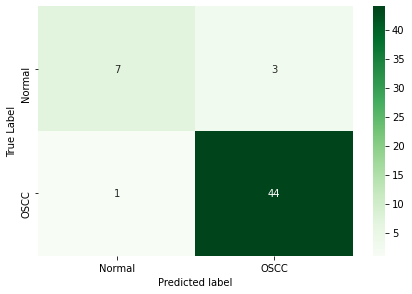

In [ ]:
figure1 = plt.figure()

LABELS = ['Normal', 'OSCC']
sns.heatmap(test_confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot = True, cmap=plt.cm.Greens, fmt='d')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.savefig('Test data Confusion Matrix', dpi=250)
plt.show()

#GRADCAM VISUALIZATION

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
model = loaded_model # the first step is to load the pre-trained model

In [ ]:
img_size = (224, 224) # the OG image is huge so we tone it down to this res
preprocess_input = keras.applications.resnet50.preprocess_input
decode_predictions = keras.applications.resnet50.decode_predictions
# preprocessing_input and decoding_predictions are the functions of the resnet50

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 224x224
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (224, 224, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 224, 224, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

[[-4.649853   1.5915945]]


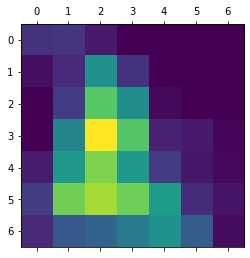

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array('/content/drive/MyDrive/Colab Notebooks/2nd semester/2.CNN project/Grad Cam/OSCC_100x_5.jpg', size=img_size))

# Make model
model = model

# Remove last layer's softmax
model.layers[-1].activation = None
print(model.layers[-1])
# Print what the top predicted class is
preds = model.predict(img_array)
print(preds)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'conv5_block3_out')

# Display heatmap
plt.matshow(heatmap)
plt.show()

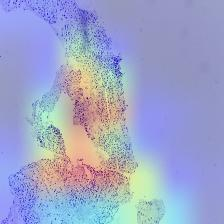

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam('/content/drive/MyDrive/Colab Notebooks/2nd semester/2.CNN project/Grad Cam/OSCC_100x_5.jpg', heatmap)

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

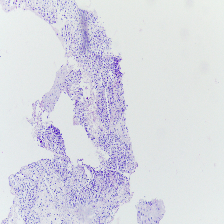

In [ ]:
img1 = load_img('/content/drive/MyDrive/Colab Notebooks/2nd semester/2.CNN project/Grad Cam/OSCC_100x_5.jpg',target_size=(224,224))
img1